In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../ficheros/dataframe_estudio.csv', index_col = 0)
df.shape

(2297, 10)

### Pregunta 1: ¿Cuáles son las librerías de visualización que más usa un Data Analyst?

### Limpieza

In [3]:
def crear_filas(df,patron,columna):
    """
    Esta función divide la respuesta de cada individuo separándola por comas y crea 1 fila por cada separación
    Args: 
    df(df):dataframe sobre el que queremos aplicar los cambios
    patron(string): es el patron por el que nuestra función nos va a hacer la separación
    columna(string): es el nombre de la columna sobre la que queremos aplicar nuestra función
    """
    
    df[columna] = df[columna].str.split(patron, n = -1) 
    
    return df.explode(columna)

In [4]:
df = crear_filas(df, '/', 'visualization')

In [5]:
df = crear_filas(df, ',', 'visualization')

In [6]:
df['visualization'].unique()

array([' Matplotlib ', 'Seaborn ', 'Plotly ', ' Plotly Express ',
       'Ggplot ', ' ggplot2 ', ' None', 'Shiny ', ' Other', 'Geoplotlib ',
       'unknown', 'D3 js ', 'Altair ', 'Bokeh ', 'Leaflet ', ' Folium '],
      dtype=object)

In [7]:
df.shape

(6331, 10)

In [8]:
def limpieza(elemento):
    """
    Esta función nos permite eliminar los espacios que hay al principio y al final de los strings 
    Args: elementos
    elemento(string): es el dato al que le queremos quitar los espacios 
    """
    try:
        return elemento.strip()
         
    except:
        return elemento

In [9]:
df['visualization'] = df['visualization'].apply(limpieza)
df['visualization'].unique()

array(['Matplotlib', 'Seaborn', 'Plotly', 'Plotly Express', 'Ggplot',
       'ggplot2', 'None', 'Shiny', 'Other', 'Geoplotlib', 'unknown',
       'D3 js', 'Altair', 'Bokeh', 'Leaflet', 'Folium'], dtype=object)

### Visualización

In [10]:
df_orden = df['visualization'].value_counts().sort_values(ascending = False).head()
df_orden_desc = pd.DataFrame(df_orden).reset_index()

In [11]:
df_orden_desc

,index,visualization
0,Matplotlib,1463
1,Seaborn,1150
2,Ggplot,641
3,ggplot2,641
4,Plotly,589


In [12]:
df_orden2 = df['visualization'].value_counts().sort_values(ascending = True).head()
df_orden_asc = pd.DataFrame(df_orden2).reset_index()

In [13]:
df_orden_asc

,index,visualization
0,Altair,39
1,Leaflet,78
2,Folium,78
3,D3 js,81
4,Bokeh,103


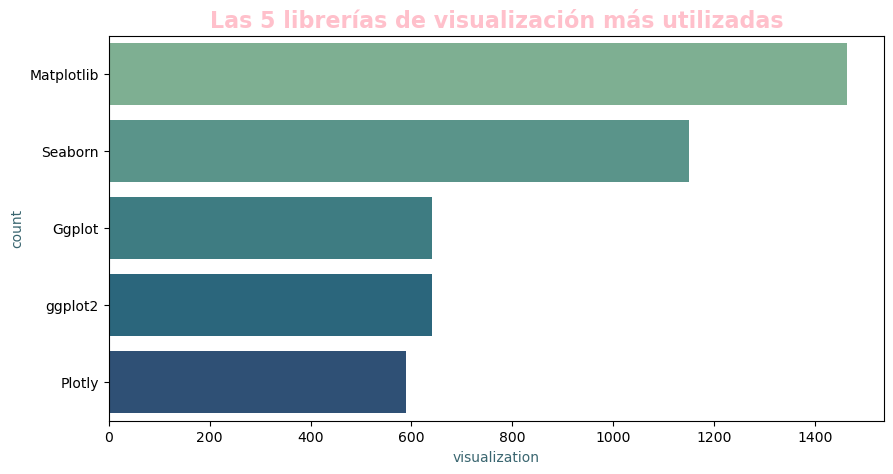

In [15]:
plt.figure(figsize =(10,5))
sns.barplot(y = "index", x = "visualization", data = df_orden_desc, palette="crest")
plt.title("Las 5 librerías de visualización más utilizadas", color = "pink", fontweight='bold', fontsize = 16);
plt.xlabel("visualization", color = "#3a6670");
plt.ylabel("count", color = "#3a6670");
#fig.tight_layout()

### Conclusiones

Los datos muestran que las librerías de visualización más utilizadas son 'Matplotlib', 'Seaborn', 'Ggplot', 'ggplot2' y 'plotly'. Las más utilizadas son matplotlib y seaborn ya que:
1. Matplotlib ofrece una gran flexibilidad a la hora de personalizar las gráficas y además su rendimiento es muy alto. 

2. A su vez, ya que su sintaxis es muy reducida y sencilla a la hora de utilizarla

Además ambas librerías están muy bien integradas con Pandas y Numpy



Por tanto, Adalab en este momento está alineada con la actualidad y utiliza en sus cursos las librerías de visualización que más utilizan los analistas de datos en el sector laboral.